<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Assignment:  Simplifying Cancer Treatment

*The comments/sections provided are your cues to perform the assignment. You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.*

*If at any point in time you need help on solving this assignment, view our demo video to understand the different steps of the code.*

**Happy coding!**

* * *

# Simplifying Cancer Treatment

__DESCRIPTION__

John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in treating breast cancer. Over the last few years, JCH has collected breast cancer data from patients who came for screening/treatment. However, this data has almost 30 attributes, and it is difficult to run and interpret the results. You, as an ML expert, have to reduce the number of attributes
(Dimensionality Reduction) so that the results are meaningful and accurate.

__Objective:__ Reduce the number of attributes/features in data to make the analysis of the results comprehensible to doctors.

__Actions to Perform:__

    Use pandas to read data as a dataframe.
    Check the data. There should be no missing values.
    Convert the diagnosis column to 1/0 and store in a new column target.
    Store the encoded column in dataframe and drop the diagnosis column for simplicity.
    Scale the data so that each feature has a single unit variance.
    Transform this data to its first 2 principal components.
    Plot the two dimensions.
    Print the explained variance.
    Try the same with 3 principal components.
    Check the accuracy for 2nd and 3rd components.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-pandas-to-read-data-as-a-dataframe." data-toc-modified-id="Use-pandas-to-read-data-as-a-dataframe.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use pandas to read data as a dataframe.</a></span></li><li><span><a href="#Check-the-data,-there-should-be-no-missing-values" data-toc-modified-id="Check-the-data,-there-should-be-no-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check the data, there should be no missing values</a></span></li><li><span><a href="#Convert-diagnosis-column-to-1/0-and-store-in-new-column-target" data-toc-modified-id="Convert-diagnosis-column-to-1/0-and-store-in-new-column-target-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convert diagnosis column to 1/0 and store in new column target</a></span></li><li><span><a href="#Store-the-encoded-column-in-dataframe-and-drop-the-diagnosis-column-for-simpilcity" data-toc-modified-id="Store-the-encoded-column-in-dataframe-and-drop-the-diagnosis-column-for-simpilcity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Store the encoded column in dataframe and drop the diagnosis column for simpilcity</a></span></li><li><span><a href="#Scale-data-so-that-each-feature-has-a-single-unit-variance." data-toc-modified-id="Scale-data-so-that-each-feature-has-a-single-unit-variance.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale data so that each feature has a single unit variance.</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis:-PCA" data-toc-modified-id="Principal-Component-Analysis:-PCA-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Principal Component Analysis: PCA</a></span></li></ul></li><li><span><a href="#Transform-this-data-to-its-first-2-principal-components" data-toc-modified-id="Transform-this-data-to-its-first-2-principal-components-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Transform this data to its first 2 principal components</a></span></li><li><span><a href="#plot-the-two-dimensions" data-toc-modified-id="plot-the-two-dimensions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>plot the two dimensions</a></span><ul class="toc-item"><li><span><a href="#Interpreting-the-components" data-toc-modified-id="Interpreting-the-components-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Interpreting the components</a></span></li></ul></li><li><span><a href="#Print-the-Explained-Variance" data-toc-modified-id="Print-the-Explained-Variance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Print the Explained Variance</a></span></li><li><span><a href="#Try-with-3-Principal-Components" data-toc-modified-id="Try-with-3-Principal-Components-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Try with 3 Principal Components</a></span></li><li><span><a href="#check-the-accuracy-for--2nd-and-3rd-components" data-toc-modified-id="check-the-accuracy-for--2nd-and-3rd-components-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>check the accuracy for  2nd and 3rd components</a></span></li></ul></div>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Use pandas to read data as a dataframe.

In [2]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

__Data Set: Cancer Data Set__

Features are computed from a digitized image of a Fine-Needle Aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

    1) ID number 
    2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Check the data, there should be no missing values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'])

## Convert diagnosis column to 1/0 and store in new column target

In [5]:
from sklearn.preprocessing import LabelEncoder

# # Encode label diagnosis
# # M -> 1
# # B -> 0

# Get All rows, but only last column
target_data=df["diagnosis"]

encoder = LabelEncoder()
target_data = encoder.fit_transform(target_data)

## Store the encoded column in dataframe and drop the diagnosis column for simpilcity

In [6]:
df.drop(["diagnosis"],axis = 1, inplace = True)

## Scale data so that each feature has a single unit variance.

### Principal Component Analysis: PCA

Let's use  PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

Now, you can transform this data to its first 2 principal components.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
pca.fit(scaled_data)

PCA(n_components=2)

## Transform this data to its first 2 principal components

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(569, 31)

In [15]:
x_pca.shape

(569, 2)

## plot the two dimensions

Text(0, 0.5, 'Second Principal Component')

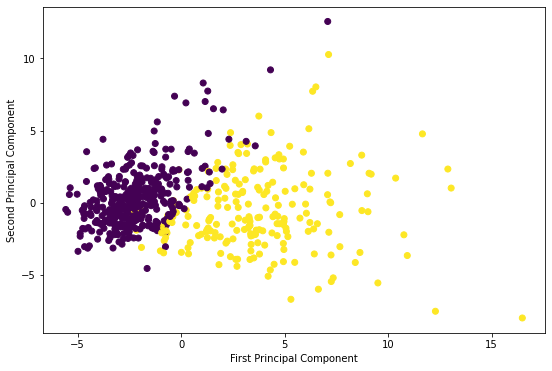

In [16]:
plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target_data,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features. The components themselves are stored as an attribute of the fitted PCA object:

In [17]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

## Print the Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as  you can convert n dimensional space to 2 dimensional space, you lose some of the variance (information).

In [18]:
print(pca.explained_variance_ratio_)

[0.42864701 0.18376792]


## Try with 3 Principal Components

In [19]:
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_data)
x_pca_3 = pca_3.transform(scaled_data)

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. You can visualize this relationship with a heatmap:

In [20]:
x_pca_3.shape

(569, 3)

In [21]:
pca_3.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436])

## check the accuracy for  2nd and 3rd components

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)

In [24]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [25]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

__Score for 2nd components__

In [26]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_data, train_output)


LogisticRegression()

In [27]:
logisticRegr.score(test_data, test_output)

0.9473684210526315

__Score for 3rd components__

In [28]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_output)
logisticRegr.score(test_data, test_output)

0.9415204678362573